---
MODULES
---

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

In [ ]:
import string
import re
import sys
import glob

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install zeyrek

In [ ]:
import nltk
import zeyrek
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering

---
GOOGLE DRIVE AUTHETICATION
---

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Insert the directory
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
INPUT_FOLDER = '/content/drive/My Drive/Colab Notebooks/DataMiningDataset/interpress/tr_news.txt'

---
DATA PREPARATION
---

In [ ]:
data = pd.read_csv(INPUT_FOLDER ,delimiter=';', names = ['category','content'])
data = data.sample(frac = 1).reset_index(drop = True)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
punc = string.punctuation
stop_words_turkish = sw.words('turkish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
def normalize_words(sentence): #yanlış yazılı kelimeleri düzelt
    analyzer = zeyrek.MorphAnalyzer()
    tokenize = wt(sentence)
    res = ""
    for w in tokenize:
        lemma = analyzer.lemmatize(w)[0][1][0]
        res = res + lemma + " "
    return res

In [ ]:
stop_words = ["a","aa","acaba","altı","altmış","ama","ancak","arada","artık","asla","aslında","aslında","ayrıca","az","bana","bazen","bazı","bazıları","belki","ben","benden","beni","benim","beri","beş","bile","bilhassa","bin","bir","biraz","birçoğu","birçok","biri","birisi","birkaç","birşey","biz","bizden","bize","bizi","bizim","böyle","böylece","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun","burada","bütün","çoğu","çoğunu","çok","çünkü","da","daha","dahi","dan","de","defa","değil","diğer","diğeri","diğerleri","diye","doksan","dokuz","dolayı","dolayısıyla","dört","e","edecek","eden","ederek","edilecek","ediliyor","edilmesi","ediyor","eğer","elbette","elli","en","etmesi","etti","ettiği","ettiğini","fakat","falan","filan","gene","gereği","gerek","gibi","göre","hala","halde","halen","hangi","hangisi","hani","hatta","hem","henüz","hep","hepsi","her","herhangi","herkes","herkese","herkesi","herkesin","hiç","hiçbir","hiçbiri","i","ı","için","içinde","iki","ile","ilgili","ise","işte","itibaren","itibariyle","kaç","kadar","karşın","kendi","kendilerine","kendine","kendini","kendisi","kendisine","kendisini","kez","ki","kim","kime","kimi","kimin","kimisi","kimse","kırk","madem","mi","mı","milyar","milyon","mu","mü","nasıl","ne","neden","nedenle","nerde","nerede","nereye","neyse","niçin","nin","nın","niye","nun","ın","in","un","nün","o","öbür","olan","olarak","oldu","olduğu","olduğunu","olduklarını","olmadı","olmadığı","olmak","olması","olmayan","olmaz","olsa","olsun","olup","olur","olur","olursa","oluyor","on","ön","ona","önce","ondan","onlar","onlara","onlardan","onları","onların","onu","onun","orada","öte","ötürü","otuz","öyle","oysa","pek","rağmen","sana","sanki","sanki","şayet","şekilde","sekiz","seksen","sen","senden","seni","senin","şey","şeyden","şeye","şeyi","şeyler","şimdi","siz","siz","sizden","sizden","size","sizi","sizi","sizin","sizin","sonra","şöyle","şu","şuna","şunları","şunu","ta","tabii","tam","tamam","tamamen","tarafından","trilyon","tüm","tümü","u","ü","üç","un","ün","üzere","var","vardı","ve","veya","ya","yani","yapacak","yapılan","yapılması","yapıyor","yapmak","yaptı","yaptığı","yaptığını","yaptıkları","ye","yedi","yerine","yetmiş","yi","yı","yine","yirmi","yoksa","yu","yüz","zaten","zira","a","b","c", "d","ç","e", "f","g","ğ","h","ı", "i","j","k","l","m","n","o","ö","p","r","s","ş","t","q","v","y","z","na","geldi","den", "la", "ndaki","in","nu","dir","yle","li","su","ettik", "luk","nda","te","aynı", "verdi", "deki","nden","ndan","lük","lik","aa"]


In [ ]:
from collections import Counter

def count_words(df):
  all_words = []
  for idx,rows in df.iterrows():
      text = rows.content
      all_words.extend(text.split(" "))

  words_freq = Counter(all_words)
  return words_freq




In [ ]:
# to lowercase operation for every single word

threshold = 30
words_freq = dict(filter(lambda x: x[1]>threshold, count_words(data).items()))
words = list(words_freq.keys())


bbc_dataframe = data["content"].apply(lambda x:" ".join(x.lower() for x in str(x).split()))

# punctuation remove operation
bbc_dataframe = bbc_dataframe.str.replace("[^\w\s]", "")

# number remove operation
bbc_dataframe = bbc_dataframe.str.replace("\d", "")

# türkçe stopwords'leri silmek
bbc_dataframe = bbc_dataframe.apply(lambda x : " ".join(x for x in str(x).split() if x not in stop_words_turkish and  x in words))


#bbc_dataframe = bbc_dataframe.apply(lambda sentence: normalize_words(sentence) )

# series to dataframe operation
df = pd.DataFrame(bbc_dataframe, columns = ['category','content'])
df['category'] = data['category']

In [ ]:
df['id'] = range(0, len(df['content']))

In [ ]:
# TF-IDf VECTORIZER

vec = TfidfVectorizer()
features= vec.fit_transform(df['content'])
print("Input features shape:", features.shape)
print(f"\nTake a look at the features extracted from the first news article:\n{features[0].toarray()}")

Input features shape: (4900, 5250)

Take a look at the features extracted from the first news article:
[[0. 0. 0. ... 0. 0. 0.]]


---
K-Means
---

In [ ]:
kmeans = KMeans(7, n_init=10, random_state=42)
kmeans.fit(features)
df['kmeans'] = kmeans.labels_

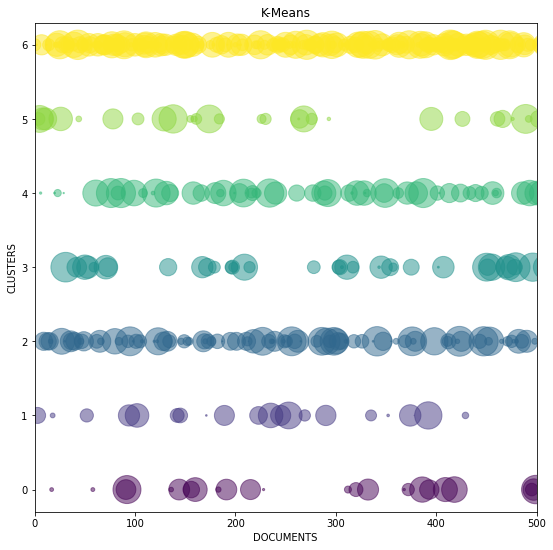

In [ ]:
area = (30 * np.random.rand(4900))**2
plt.figure(figsize=(9, 9))
plt.scatter(df['id'], df['kmeans'], c=kmeans.labels_.astype(float),s=area, alpha=0.5)
plt.title('K-Means')
plt.xlabel('DOCUMENTS')
plt.ylabel('CLUSTERS')
plt.xlim(0,500)
plt.show()


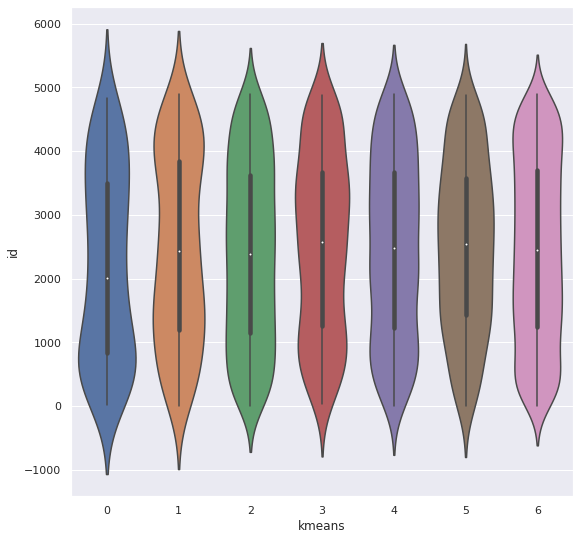

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["kmeans"], y=df['id'], data=df, orient='vertical')

---
BIRCH
---

In [ ]:
model = Birch(branching_factor = 50, n_clusters = 7)
model.fit(features)
pred = model.predict(features)
df['birch'] = pred

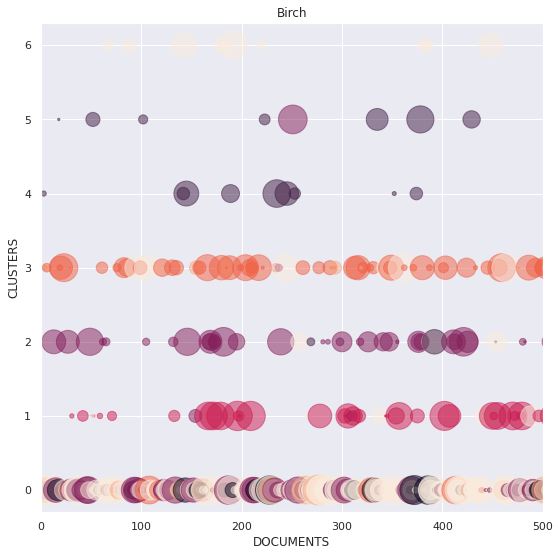

In [ ]:
area = (30 * np.random.rand(4900))**2
plt.figure(figsize=(9, 9))
plt.scatter(df['id'], df['birch'], c=kmeans.labels_.astype(float),s=area, alpha=0.5)
plt.title('Birch')
plt.xlabel('DOCUMENTS')
plt.ylabel('CLUSTERS')
plt.xlim(0,500)
plt.show()


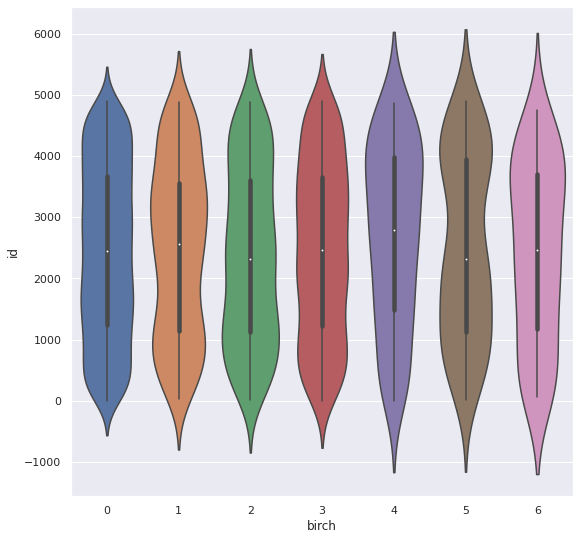

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["birch"], y=df['id'], data=df, orient='vertical')

In [ ]:
df['birch'].value_counts()

0    3138
3     664
1     450
2     386
5     105
4      93
6      64
Name: birch, dtype: int64

---
Spectral Clustering
---

In [ ]:
sc = SpectralClustering(n_clusters=7, assign_labels='discretize', random_state=0).fit(features)
sc.labels_
df['spectral'] = sc.labels_

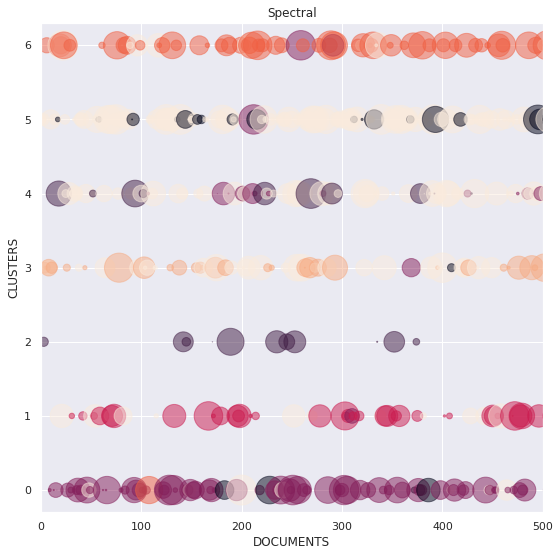

In [ ]:
area = (30 * np.random.rand(4900))**2
plt.figure(figsize=(9, 9))
plt.scatter(df['id'], df['spectral'], c=kmeans.labels_.astype(float),s=area, alpha=0.5)
plt.title('Spectral')
plt.xlabel('DOCUMENTS')
plt.ylabel('CLUSTERS')
plt.xlim(0,500)
plt.show()


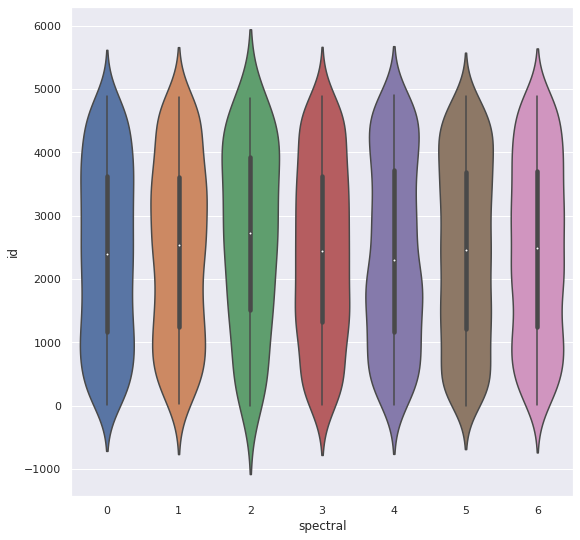

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["spectral"], y=df['id'], data=df, orient='vertical')

In [ ]:
df['kmeans'].value_counts()

6    2143
2     882
4     648
3     461
5     388
1     224
0     154
Name: kmeans, dtype: int64

In [ ]:
df['spectral'].value_counts()

5    1247
0     885
6     784
4     711
3     579
1     572
2     122
Name: spectral, dtype: int64

In [ ]:
df['birch'].value_counts()

0    3138
3     664
1     450
2     386
5     105
4      93
6      64
Name: birch, dtype: int64

In [ ]:
df['category'].value_counts()

spor         700
saglik       700
siyaset      700
kultur       700
dunya        700
teknoloji    700
ekonomi      700
Name: category, dtype: int64

In [ ]:
df['category'] = df['category'].replace(['teknoloji'],0)
df['category'] = df['category'].replace(['saglik'],1)
df['category'] = df['category'].replace(['siyaset'],2)
df['category'] = df['category'].replace(['dunya'],3)
df['category'] = df['category'].replace(['spor'],4)
df['category'] = df['category'].replace(['kultur'],5)
df['category'] = df['category'].replace(['ekonomi'],6)
df['category'].value_counts()

3    700
6    700
2    700
5    700
1    700
4    700
0    700
Name: category, dtype: int64

In [ ]:
df

,category,content,id,kmeans,birch,spectral
0,0,i in twitter hesabı bilgiye göre öğle saatleri...,0,6,0,5
1,5,kitap belli oldu onlar soruya doğru cevap bizd...,1,6,0,5
2,0,whatsapp yok in henüz yerini yeni işletim sist...,2,6,0,5
3,3,israil in saldırıları kabul edilemez israil in...,3,1,4,2
4,6,milyar dolar parası oldu kuru iş adamları dern...,4,5,3,3
...,...,...,...,...,...,...
4895,1,dünyada değişen yaşam geçen gün astım görülme ...,4895,4,3,6
4896,3,dan ibrahimi nin ateşkes bm suriye özel temsil...,4896,1,5,4
4897,5,yıl sonra yeniden türkiye den yılında değerli ...,4897,6,0,0
4898,1,tehdit ediyor tıp_fakültesi göğüs hastalıkları...,4898,4,3,6


---
METRICS
---

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, rand_score, homogeneity_score, completeness_score, v_measure_score
import math

y_pred = df['kmeans']
y_true = df['category']
print("Accuracy = ", accuracy_score(y_true, y_pred))
print("Precision Score = ", precision_score(y_true, y_pred, average='macro'))
print("Recall Score = ", recall_score(y_true, y_pred, average='macro'))
print("F1 Score = ", f1_score(y_true, y_pred, average='macro'))

difference_array = np.subtract(y_pred, y_true)
squared_array = np.square(difference_array)
print("\n\nMSE = ", squared_array.mean())
print("RMSE = ", math.sqrt(squared_array.mean()))
print("MAE = ", mean_absolute_error(y_true, y_pred))
print("\n\nRand Score = ", rand_score(y_true, y_pred))
print("Homogeneity Score", homogeneity_score(y_true, y_pred))
print("Completeness Score", completeness_score(y_true, y_pred))
print("V Measure Score ",v_measure_score(y_true, y_pred))

Accuracy =  0.1657142857142857
Precision Score =  0.1083482271161479
Recall Score =  0.16571428571428573
F1 Score =  0.12518814753862495


MSE =  9.412040816326531
RMSE =  3.0679049555562394
MAE =  2.389183673469388


Rand Score =  0.7528729311687933
Homogeneity Score 0.38656023939074313
Completeness Score 0.46695851715601555
V Measure Score  0.42297276959135455


In [ ]:
y_pred = df['birch']
y_true = df['category']
print("Accuracy = ", accuracy_score(y_true, y_pred))
print("Precision Score = ", precision_score(y_true, y_pred, average='macro'))
print("Recall Score = ", recall_score(y_true, y_pred, average='macro'))
print("F1 Score = ", f1_score(y_true, y_pred, average='macro'))

difference_array = np.subtract(y_pred, y_true)
squared_array = np.square(difference_array)
print("\n\nMSE = ", squared_array.mean())
print("RMSE = ", math.sqrt(squared_array.mean()))
print("MAE = ", mean_absolute_error(y_true, y_pred))
print("\n\nRand Score = ", rand_score(y_true, y_pred))
print("Homogeneity Score", homogeneity_score(y_true, y_pred))
print("Completeness Score", completeness_score(y_true, y_pred))
print("V Measure Score ",v_measure_score(y_true, y_pred))

Accuracy =  0.19285714285714287
Precision Score =  0.14687562062457277
Recall Score =  0.19285714285714287
F1 Score =  0.13147599695709383


MSE =  12.191224489795918
RMSE =  3.4915934027025424
MAE =  2.8553061224489795


Rand Score =  0.6025800350758798
Homogeneity Score 0.28932101886475337
Completeness Score 0.4731189020176637
V Measure Score  0.3590663054932925


In [ ]:
y_pred = df['spectral']
y_true = df['category']
print("Accuracy = ", accuracy_score(y_true, y_pred))
print("Precision Score = ", precision_score(y_true, y_pred, average='macro'))
print("Recall Score = ", recall_score(y_true, y_pred, average='macro'))
print("F1 Score = ", f1_score(y_true, y_pred, average='macro'))

difference_array = np.subtract(y_pred, y_true)
squared_array = np.square(difference_array)
print("\n\nMSE = ", squared_array.mean())
print("RMSE = ", math.sqrt(squared_array.mean()))
print("MAE = ", mean_absolute_error(y_true, y_pred))
print("\n\nRand Score = ", rand_score(y_true, y_pred))
print("Homogeneity Score", homogeneity_score(y_true, y_pred))
print("Completeness Score", completeness_score(y_true, y_pred))
print("V Measure Score ",v_measure_score(y_true, y_pred))

Accuracy =  0.13591836734693877
Precision Score =  0.10639592003802857
Recall Score =  0.13591836734693877
F1 Score =  0.10921922687791082


MSE =  11.483673469387755
RMSE =  3.388756920964936
MAE =  2.8485714285714288


Rand Score =  0.8390983582655352
Homogeneity Score 0.4436551453084958
Completeness Score 0.4728641831378569
V Measure Score  0.4577942251077988
